In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlalchemy

from database_credentials import get_database_url
from datetime import datetime, timedelta

In [2]:
plt.style.use('ggplot')
sns.set_style('white')

In [3]:
database_url = get_database_url()
engine = sqlalchemy.create_engine(database_url)
connection = engine.connect()

In [4]:
buy_data = pd.read_sql_table('buy_data', connection)
sell_data = pd.read_sql_table('sell_data', connection)

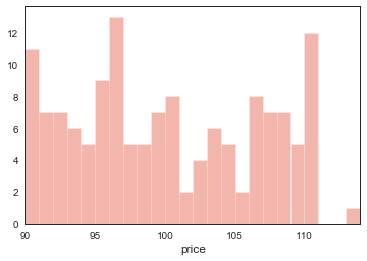

Buying Prices Description:
count    142.000000
mean      99.718310
std        6.612224
min       90.000000
25%       94.250000
50%       99.000000
75%      106.000000
max      114.000000
Name: price, dtype: float64



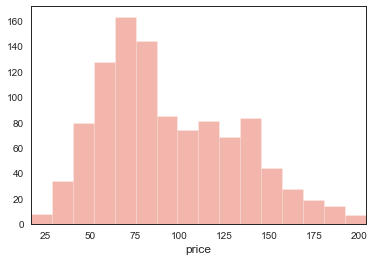

Selling Prices:
count    1079.000000
mean      100.400371
std        60.777134
min        17.000000
25%        65.000000
50%        86.000000
75%       125.000000
98%       203.880000
max       589.000000
Name: price, dtype: float64



In [39]:
buy_prices = buy_data['price']
buy_price_describe = buy_prices.describe()
buy_min = buy_price_describe['min']
buy_max = buy_price_describe['max']

sns.distplot(buy_prices, bins=24, kde=False)
plt.xlim(buy_min, buy_max)
plt.show()
print("Buying Prices Description:\n{0}\n".format(buy_price_describe))

sell_prices = sell_data['price']
sell_percentiles = [0.25, 0.50, 0.75, 0.98]
sell_price_describe = sell_prices.describe(percentiles=sell_percentiles)
sell_min = sell_price_describe['min']
sell_98_percentile = sell_price_describe['98%']

sns.distplot(sell_prices, kde=False)
plt.xlim(sell_min, sell_98_percentile)
plt.show()
print("Selling Prices:\n{0}\n".format(sell_price_describe))

In [ ]:
sell_data_pivot = pd.pivot_table(
    sell_data, 
    values='price', 
    index=['user_id', 'island_id'], 
    columns=['datetime_observed']
)
display(sell_data_pivot.head(3))

In [ ]:
sell_data['user_island_id'] = list(zip(sell_data['user_id'], sell_data['island_id']))
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime_observed', y='price', data=sell_data, hue='user_island_id', legend=False)
plt.show()

In [ ]:
query = '''
    SELECT *
    FROM sell_data
    WHERE datetime_observed < '2020-04-19'
'''
week1_sell_data = pd.read_sql(query, connection)

query2 = '''
    SELECT *
    FROM sell_data
    WHERE datetime_observed > '2020-04-19'
'''
week2_sell_data = pd.read_sql(query2, connection)

In [ ]:
week1_sell_data

In [ ]:
connection.close()
engine.dispose()